In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
import numpy as np 
import pandas as pd

2025-04-28 15:42:09.755354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745854930.108596      40 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745854930.191148      40 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
classes = ["airplane", "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]
     

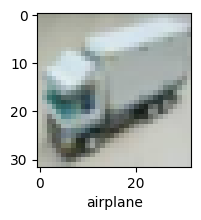

In [7]:
import matplotlib.pyplot as plt 

import numpy as np

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[np.argmax(y[index])])  # <-- fix here


plot_sample(X_train , y_train , 53)

In [8]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# 1. Import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

# 2. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)




In [11]:
# 3. Build the CNN Model
model = Sequential([
    # First convolutional block
    Conv2D(64, (3,3), activation="relu", input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional block
    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Third convolutional block
    Conv2D(256, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten and Fully connected layers
    Flatten(),
    Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.6),  # increased from 0.5
    Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    # Output layer
    Dense(10, activation="softmax")
])


In [12]:

# 4. Compile the Model (Lower Learning Rate)
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [13]:
# 5. Train the Model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,  # train longer
    validation_data=(X_test, y_test)
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745854990.161957     109 service.cc:148] XLA service 0x7beec4014be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745854990.162923     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745854990.162943     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745854990.689059     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  6/782 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.1010 - loss: 5.7519 

I0000 00:00:1745854995.640977     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.1824 - loss: 3.5253 - val_accuracy: 0.3747 - val_loss: 2.6153
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.3706 - loss: 2.5221 - val_accuracy: 0.4636 - val_loss: 2.1146
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4692 - loss: 2.0373 - val_accuracy: 0.5936 - val_loss: 1.5622
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5536 - loss: 1.6814 - val_accuracy: 0.6048 - val_loss: 1.4381
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6038 - loss: 1.4693 - val_accuracy: 0.6507 - val_loss: 1.2764
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6384 - loss: 1.3439 - val_accuracy: 0.5978 - val_loss: 1.4861
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6631 - loss: 1.2469 - val_accuracy: 0.6512 - val_loss: 1.2938
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6856 - loss: 1.1720 - val_accurac